In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
drive = '/content/drive/MyDrive/Mestrado/IA048/'
df = pd.read_csv('/content/air traffic.csv', usecols = ['Year', 'Month', 'Flt'])

df['Flt'] = df['Flt'].str.replace(',', '')
df['Flt'] = df['Flt'].astype(int)
df['Data'] = df.apply(lambda x: '{:02d}/{:d}'.format(x['Month'], x['Year']), axis=1)
df

,Year,Month,Flt,Data
0,2003,1,842827,01/2003
1,2003,2,741610,02/2003
2,2003,3,856120,03/2003
3,2003,4,821265,04/2003
4,2003,5,844662,05/2003
...,...,...,...,...
244,2023,5,739255,05/2023
245,2023,6,736572,06/2023
246,2023,7,764677,07/2023
247,2023,8,768619,08/2023


## a) Exiba o gráfico da série temporal completa. Numa inspeção visual simples, ́e possível reconhecer ao menos três faixas distintas de comportamento aproximadamente “regular” na série: (i) Jan/2003 a Ago/2008; (ii) Set/2008 a Dez/2019; (ii) Jan/2020 a Set/2023. Discuta possíveis razões históricas / econômicas para essas transições de comportamento.

Text(0, 0.5, 'Número Total de Voos')

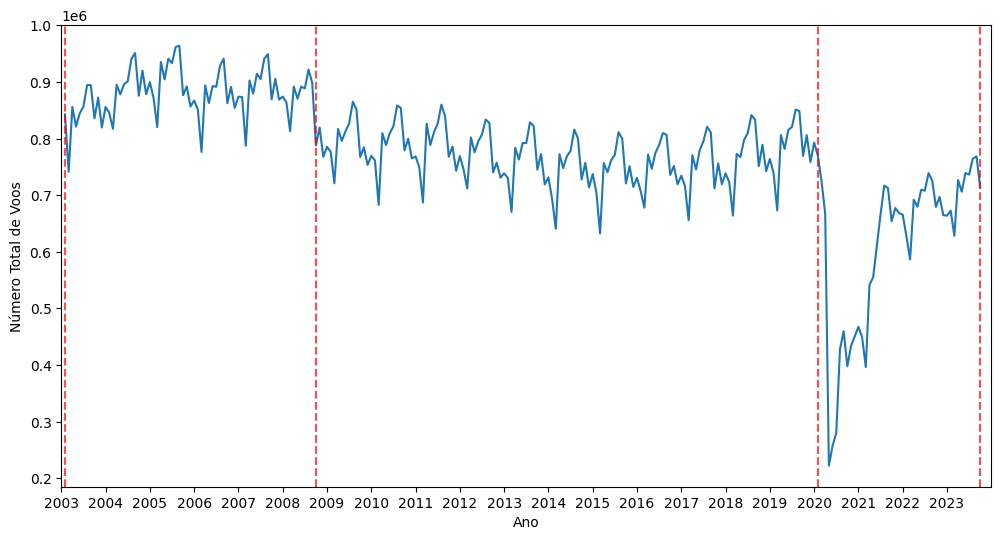

In [ ]:
plt.figure(figsize=(12,6),facecolor='white')
plt.plot(df['Year'] + df['Month'] / 12, df['Flt'])
plt.xticks(df['Year'].unique())
plt.xlim(2003, 2024)
plt.axvline(x=2003 + 1/12, color='red', linestyle='--', alpha=0.7)  # 01/2003
plt.axvline(x=2008 + 9/12, color='red', linestyle='--', alpha=0.7)  # 09/2008
plt.axvline(x=2020 + 1/12, color='red', linestyle='--', alpha=0.7)  # 01/2020
plt.axvline(x=2023 + 9/12, color='red', linestyle='--', alpha=0.7)  # 09/2023

plt.xlabel('Ano')
plt.ylabel('Número Total de Voos')

# plt.savefig(drive+'a.png')

##  b) Divida a série em dois conjuntos: (i) treinamento e validação, com amostras de 2003 a 2019; (ii) teste, com amostras de 2020 a 2023. Faça a análise de desempenho do preditor linear ótimo, no sentido de quadrados mínimos irrestrito, considerando:

In [ ]:
# Dividindo em 75% treino e 25% validação
df_treino = df['Flt'].iloc[:204]
df_teste = df['Flt'].iloc[204:]

# indice_treino = df_treino.index
# indice_teste = df_teste.index

# # Normalizando os dados
# p = MinMaxScaler()
# dados = df_treino.values
# dados = dados.reshape(-1,1)
# escala = p.fit(dados)
# dados_norm = escala.transform(dados)
# df_treino = pd.Series(list(dados_norm.reshape(-1,1)), index = indice_treino)

# p = MinMaxScaler()
# dados = df_teste.values
# dados = dados.reshape(-1,1)
# escala = p.fit(dados)
# dados_norm = escala.transform(dados)
# df_teste = pd.Series(list(dados_norm.reshape(-1,1)), index = indice_teste)

#df_validacao = df['Pax'].iloc[153:204]
#len(df_teste)


In [ ]:
len(df.iloc[204:])

45

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Melhor valor de K: 14
Melhor RMSE: 11948.632165108287


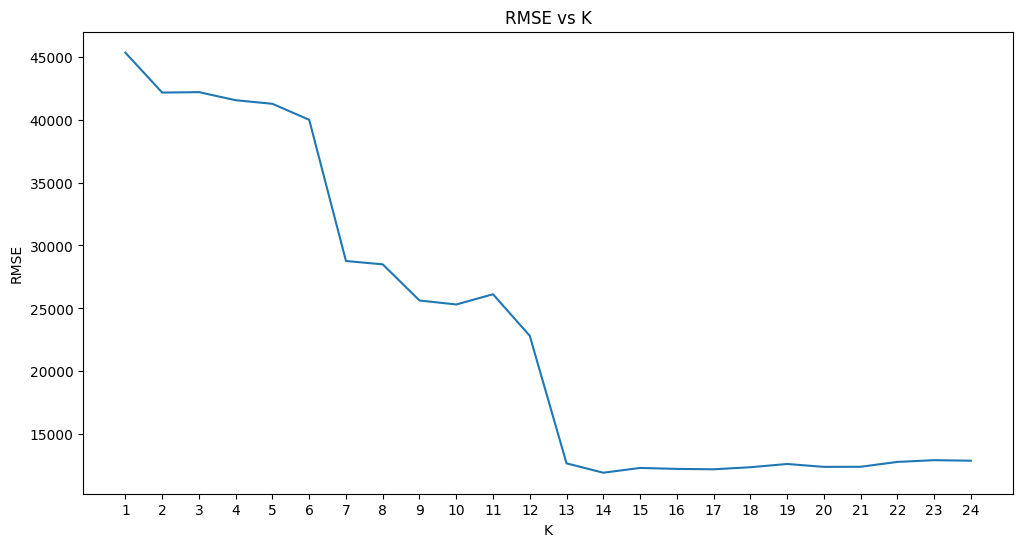

In [ ]:
n_k = 24
rmse_k = []
melhor_rmse = float('inf')
melhor_k = 0
melhor_modelo = None

p_treino = int(len(df_treino)*0.75)
for k in range(1, n_k + 1):
    X_treino, y_treino = [], []

    for i in range(k, p_treino):
        X_treino.append(df_treino.iloc[i-k:i][::-1])
        y_treino.append(df_treino.iloc[i])
    X_treino, y_treino = np.array(X_treino), np.array(y_treino)

    model = LinearRegression()
    model.fit(X_treino, y_treino)

    X_validacao, y_validacao = [], []
    for i in range(len(df_treino)-p_treino):
        X_validacao.append(df_treino.iloc[p_treino+i-k:p_treino+i][::-1])
        y_validacao.append(df_treino.iloc[p_treino+i])
    X_validacao, y_validacao = np.array(X_validacao), np.array(y_validacao)

    y_pred = model.predict(X_validacao)

    rmse = np.sqrt(mean_squared_error(y_validacao, y_pred))

    rmse_k.append(rmse)

    if rmse < melhor_rmse:
        melhor_rmse = rmse
        melhor_k = k
        melhor_modelo = model

plt.figure(figsize=(12,6),facecolor='white')
plt.tight_layout()
plt.plot(range(1, n_k + 1), rmse_k)
plt.xlabel('K')
plt.ylabel('RMSE')
plt.title('RMSE vs K')
plt.xticks(range(1, n_k + 1))
#plt.show()
plt.savefig('/content/drive/MyDrive/Mestrado/IA048/b1.png', bbox_inches='tight')
print("Melhor valor de K:", melhor_k)
print("Melhor RMSE:", melhor_rmse)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# b2)

RMSE:  114800.5136193442 MAPE:  0.13436538884813107


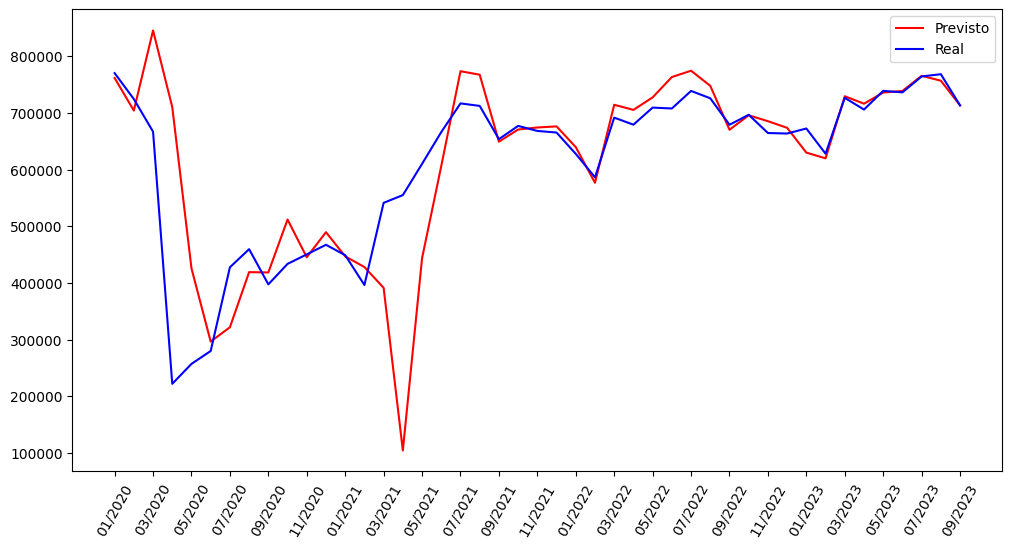

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

X_teste, y_teste = [], []
k=melhor_k
for i in range(len(df_teste)):
     X_teste.append(df['Flt'].iloc[204+i-k:204+i][::-1])
     y_teste.append(df['Flt'].iloc[204+i])

X_teste, y_teste = np.array(X_teste), np.array(y_teste)

y_pred = melhor_modelo.predict(X_teste)

rmse = np.sqrt(mean_squared_error(y_teste, y_pred))
mape = mean_absolute_percentage_error(y_teste, y_pred)

plt.figure(figsize=(12,6),facecolor='white')
plt.tight_layout()
plt.plot(df['Data'].iloc[204:],y_pred,c='r',label='Previsto')
plt.plot(df['Data'].iloc[204:],y_teste,c='b', label='Real')
plt.xticks(df['Data'].iloc[204:][::2], rotation=60)
plt.legend()
#plt.show()
plt.savefig('/content/drive/MyDrive/Mestrado/IA048/b2.png', bbox_inches='tight')
print("RMSE: ",rmse,"MAPE: ",mape)

# b3)

RMSE:  21093.083137573216 MAPE:  0.02228831328998205


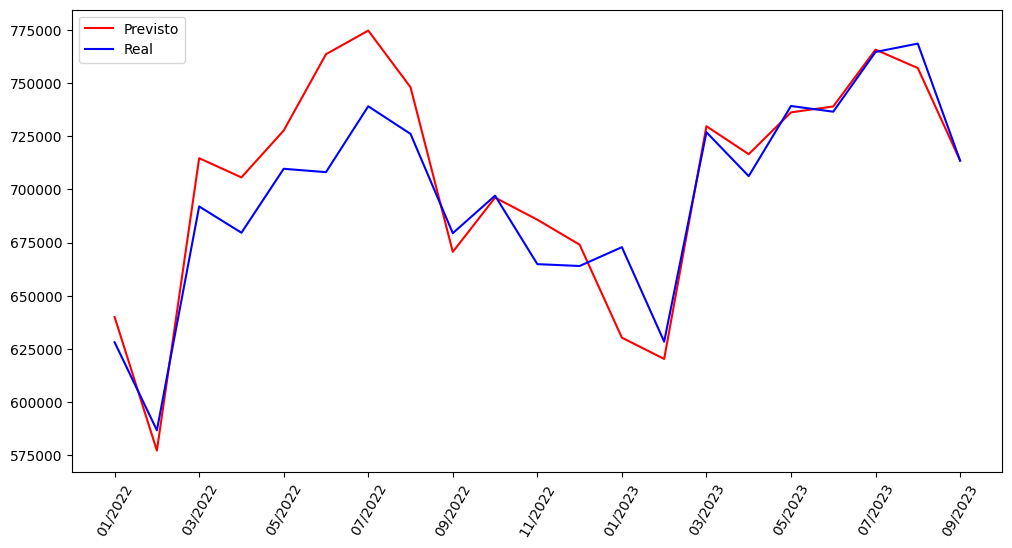

In [ ]:
X_teste, y_teste = [], []
k=melhor_k
for i in range(len(df.iloc[228:])):
    X_teste.append(df['Flt'].iloc[228+i-k:228+i][::-1])
    y_teste.append(df['Flt'].iloc[228+i])
X_teste, y_teste = np.array(X_teste), np.array(y_teste)

y_pred = melhor_modelo.predict(X_teste)

rmse = np.sqrt(mean_squared_error(y_teste, y_pred))
mape = mean_absolute_percentage_error(y_teste, y_pred)

plt.figure(figsize=(12,6),facecolor='white')
plt.tight_layout()
plt.plot(df['Data'].iloc[228:],y_pred,c='r',label='Previsto')
plt.plot(df['Data'].iloc[228:],y_teste,c='b', label='Real')
plt.xticks(df['Data'].iloc[228:][::2], rotation=60)
plt.legend()
#plt.show()
plt.savefig('/content/drive/MyDrive/Mestrado/IA048/b3.png', bbox_inches='tight')
print("RMSE: ",rmse,"MAPE: ",mape)

# c1)

In [ ]:
df[(df['Year']<=2019) & (df['Month']<=12)] #0-203(204)
df[(df['Year']>=2020) & (df['Year']<=2021)] # 204-227(228)

,Year,Month,Flt,Data
204,2020,1,770528,01/2020
205,2020,2,724758,02/2020
206,2020,3,667244,03/2020
207,2020,4,222280,04/2020
208,2020,5,257446,05/2020
209,2020,6,280256,06/2020
210,2020,7,427918,07/2020
211,2020,8,459910,08/2020
212,2020,9,397791,09/2020
213,2020,10,433913,10/2020


Melhor valor de K: 5
Melhor RMSE: 121371.60906118393


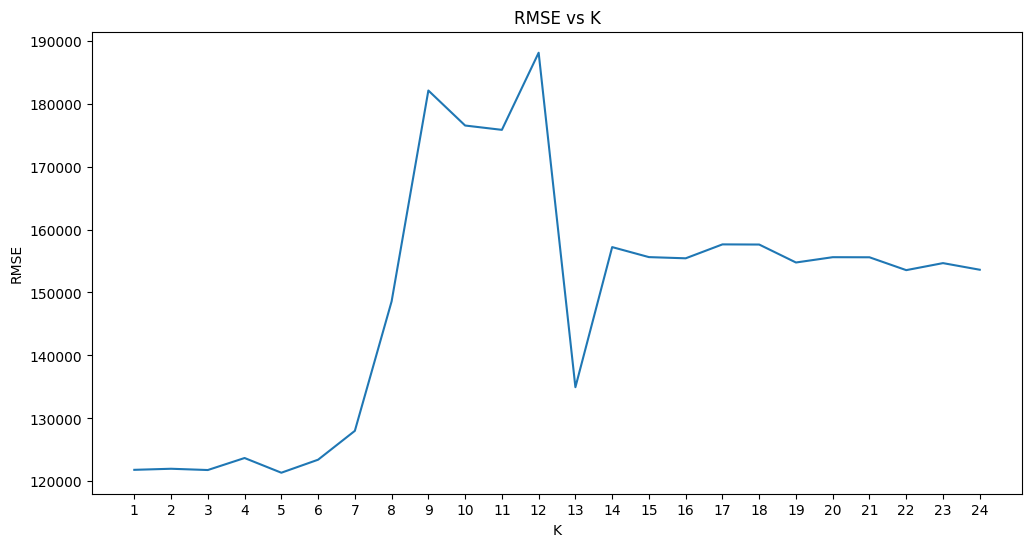

In [ ]:
n_k = 24
rmse_k = []
melhor_rmse = float('inf')
melhor_k = 0
melhor_modelo = None

for k in range(1, n_k + 1):
    X_treino, y_treino = [], []

    for i in range(k, len(df['Flt'].iloc[:204])):
        X_treino.append(df['Flt'].iloc[i-k:i][::-1])
        y_treino.append(df['Flt'].iloc[i])
    X_treino, y_treino = np.array(X_treino), np.array(y_treino)

    model = LinearRegression()
    model.fit(X_treino, y_treino)

    X_validacao, y_validacao = [], []
    for i in range(len(df['Flt'].iloc[204:228])):
        X_validacao.append(df['Flt'].iloc[204+i-k:204+i][::-1])
        y_validacao.append(df['Flt'].iloc[204+i])
    X_validacao, y_validacao = np.array(X_validacao), np.array(y_validacao)

    y_pred = model.predict(X_validacao)

    rmse = np.sqrt(mean_squared_error(y_validacao, y_pred))

    rmse_k.append(rmse)

    if rmse < melhor_rmse:
        melhor_rmse = rmse
        melhor_k = k
        melhor_modelo = model

plt.figure(figsize=(12,6),facecolor='white')
plt.tight_layout()
plt.plot(range(1, n_k + 1), rmse_k)
plt.xlabel('K')
plt.ylabel('RMSE')
plt.title('RMSE vs K')
plt.xticks(range(1, n_k + 1))
#plt.show()
plt.savefig('/content/drive/MyDrive/Mestrado/IA048/c1.png', bbox_inches='tight')
print("Melhor valor de K:", melhor_k)
print("Melhor RMSE:", melhor_rmse)


# c2

RMSE:  39682.931127697295 MAPE:  0.04781943367797399


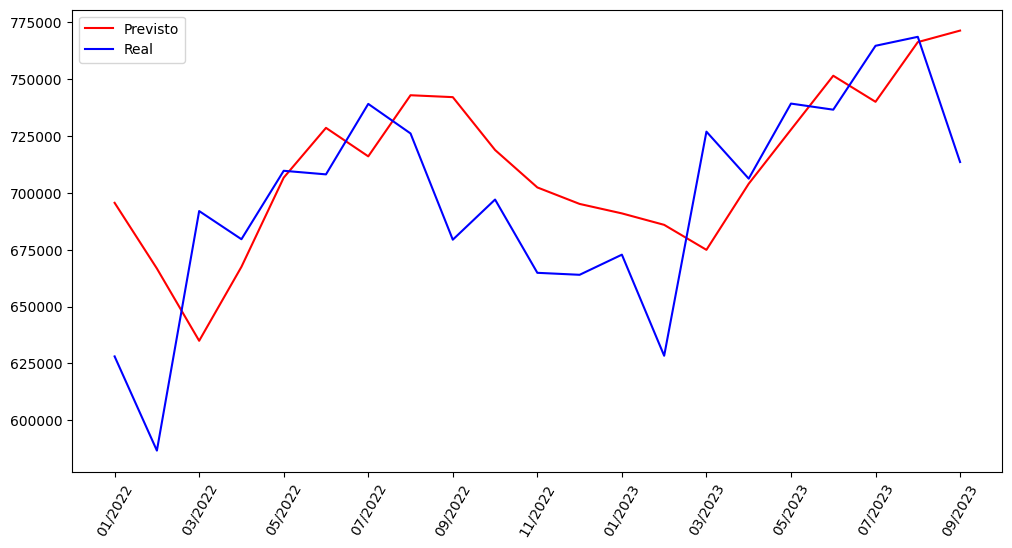

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

X_teste, y_teste = [], []
k=melhor_k
for i in range(len(df['Flt'].iloc[228:])):
    X_teste.append(df['Flt'].iloc[228+i-k:228+i][::-1])
    y_teste.append(df['Flt'].iloc[228+i])
X_teste, y_teste = np.array(X_teste), np.array(y_teste)

y_pred = melhor_modelo.predict(X_teste)

rmse = np.sqrt(mean_squared_error(y_teste, y_pred))
mape = mean_absolute_percentage_error(y_teste, y_pred)

plt.figure(figsize=(12,6),facecolor='white')
plt.tight_layout()
plt.plot(df['Data'].iloc[228:],y_pred,c='r',label='Previsto')
plt.plot(df['Data'].iloc[228:],y_teste,c='b', label='Real')
plt.xticks(df['Data'].iloc[228:][::2], rotation=60)
plt.legend()
#plt.show()
plt.savefig('/content/drive/MyDrive/Mestrado/IA048/c2.png', bbox_inches='tight')
print("RMSE: ",rmse,"MAPE: ",mape)